In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#############################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

#############################################

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [185]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [186]:
table = pd.DataFrame([])
cols = "способ выбора признаков|количество признаков|средняя точность модели".split('|')
cols

['способ выбора признаков', 'количество признаков', 'средняя точность модели']

In [187]:
x_data_generated

array([[-1.44390747, -0.23533691, -0.00816908, ...,  1.10395   ,
         0.4433315 , -1.5901827 ],
       [ 0.71296627,  0.73468178, -0.25908348, ..., -1.08941718,
         0.27218686, -0.53438446],
       [ 0.29658006, -0.94595889, -0.30163308, ..., -0.03913419,
         0.22905805, -1.58668037],
       ...,
       [ 0.04197615, -0.10242015,  0.31333796, ...,  0.69162083,
         1.17199912,  1.41411663],
       [ 2.00040224, -0.64976489,  0.19160732, ...,  0.60034793,
        -0.33801922,  1.1141553 ],
       [-2.02828691, -0.4123989 , -0.30081507, ..., -2.06361207,
        -0.70752086, -0.85348452]])

In [188]:
y_data_generated

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [189]:
x = x_data_generated
y = y_data_generated

CVS = cross_val_score(LogisticRegression(), 
                x, 
                y, 
                scoring='accuracy'
               ).mean()

CVS

0.9400000000000001

In [190]:
table  = table.append(pd.DataFrame(['0 без отбора', pd.DataFrame(x_data_generated).shape[1], CVS]).T)
table

,0,1,2
0,0 без отбора,20,0.94


In [191]:
y_data = pd.DataFrame(y_data_generated).copy()
y_data.columns=['y']
y_data

,y
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,0


In [192]:
x_data = pd.DataFrame(x_data_generated).copy()
x_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.443907,-0.235337,-0.008169,-0.054243,-2.258160,-1.897175,0.835634,0.585152,2.408831,-0.050998,0.106140,0.446975,0.443777,1.389934,0.961875,-1.102867,0.469731,1.103950,0.443332,-1.590183
1,0.712966,0.734682,-0.259083,-0.463112,1.222818,0.497725,0.216044,-2.387918,0.464740,-0.282116,0.795601,1.158932,-0.452778,-1.170626,-0.477648,0.168586,1.357943,-1.089417,0.272187,-0.534384
2,0.296580,-0.945959,-0.301633,0.821809,0.483669,-0.561204,2.155936,-0.658779,1.302593,0.557019,-1.013398,-0.994741,-0.246328,-0.488151,-0.490416,-0.329204,2.128511,-0.039134,0.229058,-1.586680
3,-0.294819,0.707675,0.368912,0.336778,-0.899571,-0.415120,0.015425,-0.094343,-0.072354,2.320667,2.766539,1.647024,0.791999,2.125660,1.119721,-1.894629,-0.316034,0.349311,-0.544105,0.255021
4,-0.762527,-2.262060,-0.232741,1.265861,-0.012972,-0.124177,1.929320,0.898886,-0.249862,-1.417725,-0.614492,0.794443,-0.288786,-0.684170,-0.098917,-0.069476,-0.583262,-0.385934,-0.174311,-0.885205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.053374,-0.266648,-0.519835,2.017822,-1.174985,-1.340071,-1.708851,-0.284557,0.738773,-1.453067,0.489503,0.241178,-1.183898,-3.206750,0.601057,0.515409,-1.376843,1.476948,-0.022995,-0.126164
96,2.364179,0.584167,-0.160343,0.587164,-0.068686,-0.379379,0.333250,-1.835838,-1.715606,1.077072,0.886722,1.182108,-0.252296,-0.637507,0.155768,-0.829840,0.898292,0.398367,-2.483145,-0.426631
97,0.041976,-0.102420,0.313338,0.013872,-0.548003,-1.436932,2.216461,0.946815,-0.061278,1.336530,0.792123,-0.923654,0.324052,0.719429,0.361933,1.890090,1.504384,0.691621,1.171999,1.414117
98,2.000402,-0.649765,0.191607,0.439573,0.290142,-0.131178,-1.143716,-0.536740,-1.822837,-0.007170,1.517018,-0.191014,0.125545,0.213738,-0.601949,1.097593,0.359341,0.600348,-0.338019,1.114155


In [193]:
x_tot = x_data.join(y_data, how='left')
x_tot.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y
0,-1.443907,-0.235337,-0.008169,-0.054243,-2.258160,-1.897175,0.835634,0.585152,2.408831,-0.050998,...,0.446975,0.443777,1.389934,0.961875,-1.102867,0.469731,1.103950,0.443332,-1.590183,1
1,0.712966,0.734682,-0.259083,-0.463112,1.222818,0.497725,0.216044,-2.387918,0.464740,-0.282116,...,1.158932,-0.452778,-1.170626,-0.477648,0.168586,1.357943,-1.089417,0.272187,-0.534384,0
2,0.296580,-0.945959,-0.301633,0.821809,0.483669,-0.561204,2.155936,-0.658779,1.302593,0.557019,...,-0.994741,-0.246328,-0.488151,-0.490416,-0.329204,2.128511,-0.039134,0.229058,-1.586680,0


In [194]:
corr_cols = list(x_tot.corr()[['y']].sort_values(by='y').query('abs(y) > 0.1').reset_index()['index'])
corr_cols

[5, 3, 6, 9, 14, 2, 13, 12, 'y']

In [195]:
x_tot_1 = x_tot[corr_cols].copy()
x_tot_1

,5,3,6,9,14,2,13,12,y
0,-1.897175,-0.054243,0.835634,-0.050998,0.961875,-0.008169,1.389934,0.443777,1
1,0.497725,-0.463112,0.216044,-0.282116,-0.477648,-0.259083,-1.170626,-0.452778,0
2,-0.561204,0.821809,2.155936,0.557019,-0.490416,-0.301633,-0.488151,-0.246328,0
3,-0.415120,0.336778,0.015425,2.320667,1.119721,0.368912,2.125660,0.791999,1
4,-0.124177,1.265861,1.929320,-1.417725,-0.098917,-0.232741,-0.684170,-0.288786,0
...,...,...,...,...,...,...,...,...,...
95,-1.340071,2.017822,-1.708851,-1.453067,0.601057,-0.519835,-3.206750,-1.183898,0
96,-0.379379,0.587164,0.333250,1.077072,0.155768,-0.160343,-0.637507,-0.252296,0
97,-1.436932,0.013872,2.216461,1.336530,0.361933,0.313338,0.719429,0.324052,1
98,-0.131178,0.439573,-1.143716,-0.007170,-0.601949,0.191607,0.213738,0.125545,0


In [196]:
selector = VarianceThreshold(threshold=0.8)
sel = selector.fit_transform(x_tot_1[x_tot_1.columns[:-1]])
x_tot_2 = pd.DataFrame(sel)
x_tot_2

,0,1,2,3,4
0,-1.897175,0.835634,-0.050998,0.961875,1.389934
1,0.497725,0.216044,-0.282116,-0.477648,-1.170626
2,-0.561204,2.155936,0.557019,-0.490416,-0.488151
3,-0.415120,0.015425,2.320667,1.119721,2.125660
4,-0.124177,1.929320,-1.417725,-0.098917,-0.684170
...,...,...,...,...,...
95,-1.340071,-1.708851,-1.453067,0.601057,-3.206750
96,-0.379379,0.333250,1.077072,0.155768,-0.637507
97,-1.436932,2.216461,1.336530,0.361933,0.719429
98,-0.131178,-1.143716,-0.007170,-0.601949,0.213738


In [197]:
x = x_tot_2
y = x_tot_1[x_tot_1.columns[-1]]

CVS = cross_val_score(LogisticRegression(), 
                x, 
                y, 
                scoring='accuracy'
               ).mean()

CVS

table  = table.append(pd.DataFrame(['1 корреляция и вариация', x.shape[1], CVS]).T)
table

,0,1,2
0,0 без отбора,20,0.94
0,1 корреляция и вариация,5,0.94


In [198]:
x = SelectKBest(f_classif, k=5).fit_transform(
    x_data,
    y_data)

y = y_data

CVS = cross_val_score(LogisticRegression(), 
                x, 
                y, 
                scoring='accuracy'#SelectKBest(f_classif, k=5)
               ).mean()

CVS

table  = table.append(pd.DataFrame(['2 SelectKBest_5', x.shape[1], CVS]).T)
table

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

,0,1,2
0,0 без отбора,20,0.94
0,1 корреляция и вариация,5,0.94
0,2 SelectKBest_5,5,0.93


In [199]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(x_data, y_data)
df_cols = pd.DataFrame(selector.estimator_.coef_).T.reset_index().sort_values(by=0)

med = df_cols[[0]].median()[0]

df_cols.columns=['column','par']

lst = list(df_cols.query(f'par > {med}')['column'])
lst

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9, 8, 15, 5, 11, 17, 7, 2, 12, 13]

In [200]:
x = x_data[lst]
y = y_data

CVS = cross_val_score(LogisticRegression(), 
                x, 
                y, 
                scoring='accuracy'#SelectKBest(f_classif, k=5)
               ).mean()

CVS

table  = table.append(pd.DataFrame(['3 Отбор моделью', x.shape[1], CVS]).T)
table

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

,0,1,2
0,0 без отбора,20,0.94
0,1 корреляция и вариация,5,0.94
0,2 SelectKBest_5,5,0.93
0,3 Отбор моделью,10,0.93


In [201]:
SequentialFeatureSelector

sklearn.feature_selection._sequential.SequentialFeatureSelector

In [202]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(x_data, y_data)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)
sfs.transform(x_data).shape

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

(100, 3)

In [203]:
x = sfs.transform(x_data)
y = y_data

CVS = cross_val_score(LogisticRegression(), 
                x, 
                y, 
                scoring='accuracy'#SelectKBest(f_classif, k=5)
               ).mean()

CVS

table  = table.append(pd.DataFrame(['4 Перебор признаков', x.shape[1], CVS]).T)
table

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

,0,1,2
0,0 без отбора,20,0.94
0,1 корреляция и вариация,5,0.94
0,2 SelectKBest_5,5,0.93
0,3 Отбор моделью,10,0.93
0,4 Перебор признаков,3,0.95


In [204]:
table.columns = cols
table 

,способ выбора признаков,количество признаков,средняя точность модели
0,0 без отбора,20,0.94
0,1 корреляция и вариация,5,0.94
0,2 SelectKBest_5,5,0.93
0,3 Отбор моделью,10,0.93
0,4 Перебор признаков,3,0.95


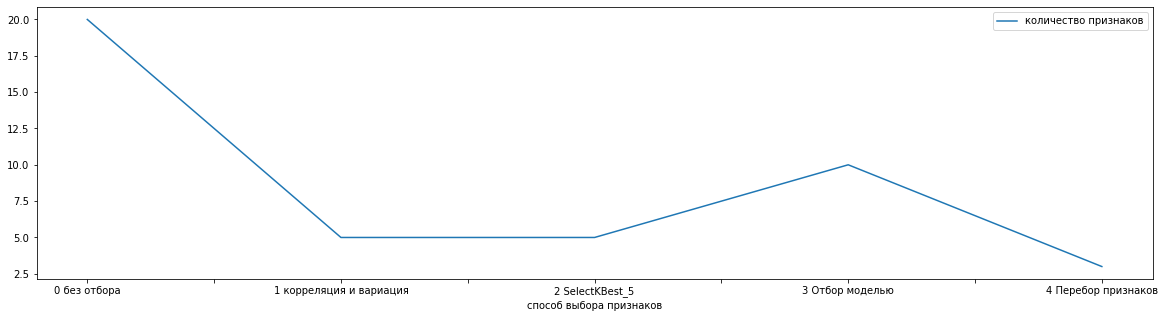

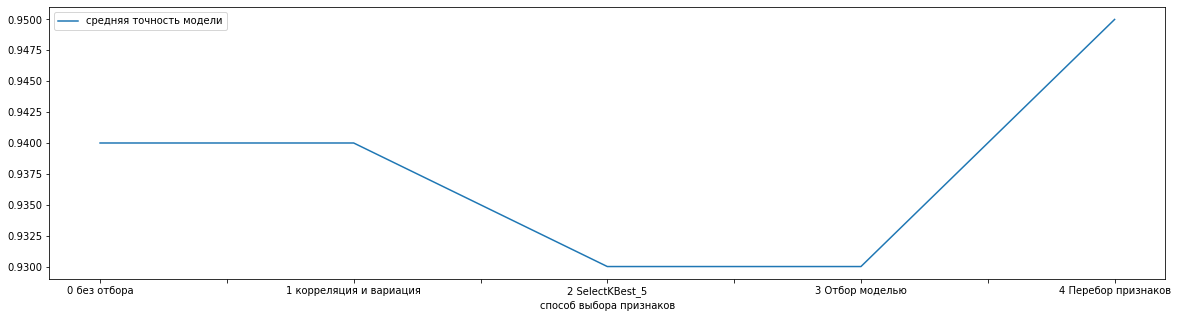

In [205]:
table[table.columns[0:2]].set_index(table.columns[0]).plot(figsize=(20,5));
table[table.columns[0:3:2]].set_index(table.columns[0]).plot(figsize=(20,5));

Разными методами удалось достигнуть точности 93-95%. 

Все варианты значительно снижают количество признаков. 

Наиболее точной оказался перебор признаков.

При разных датасетах - разные способы будут показывать точность выше или ниже.